##### Imports

In [1]:
from data_handling import *
from warnings import simplefilter
import spectral

##### Settings

In [2]:
spectral.settings.envi_support_nonlowercase_params = True
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
pd.options.plotting.backend = "plotly"
%matplotlib widget
root = get_root_folder("PC")

INFO:data_handling:Root folder set to D:\OneDriveFHNW\FHNW\EUT-P6bb-21HS-RS_M365 - General\captures


##### Globals

In [3]:
BANDS = np.round(np.linspace(900,1700,224),1);
RGB_BANDS = (81,131,181)

BAND_LOW = 8
BAND_HIGH = 210

PLOT_LABELS = {"index": "Wavelength [nm]", "value": "reflectance [1]", "variable": "pixel"}
COLUMN_NAMES = BANDS[BAND_LOW:BAND_HIGH]

In [4]:
# Read file information
capture = get_hsi_capture("mittelfraktion_tr", root)

# Laod File into RAM
data = load_hsi_data(capture)

INFO:data_handling:	Data Source:   'D:\OneDriveFHNW\FHNW\EUT-P6bb-21HS-RS_M365 - General\captures\p6bb-rs_Mittelfraktion_trocken1w_2021-11-10_10-09-30\capture\REFLECTANCE_p6bb-rs_Mittelfraktion_trocken1w_2021-11-10_10-09-30.dat'
	# Rows:            858
	# Samples:         640
	# Bands:           224
	Interleave:        BIL
	Quantization:  16 bits
	Data format:    uint16


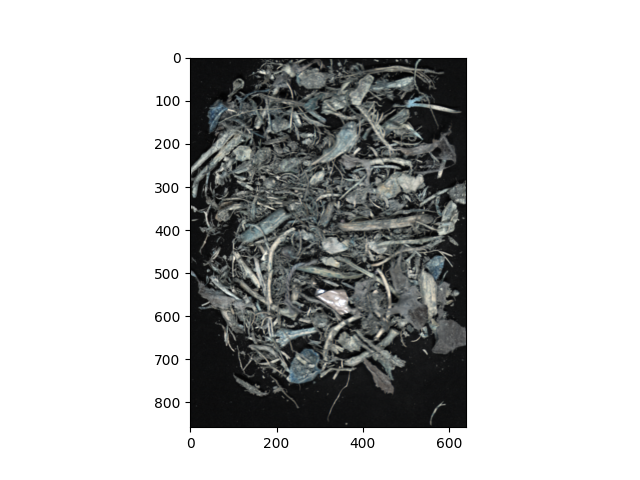

In [5]:
# Display Image, RGB_BANDS specify the indexes of the wavelength which will correspond with R, G, B colors
img = spectral.imshow(limit_reflection(data), RGB_BANDS)

In [6]:
# Select a rectangular ROI of the image for further processing, reduce spatial dimensions to a single dimension
roi = {"y_low": 385, "y_high": 485, "x_low": 350,  "x_high": 460}
roi_data = get_2d_roi(data, **roi)

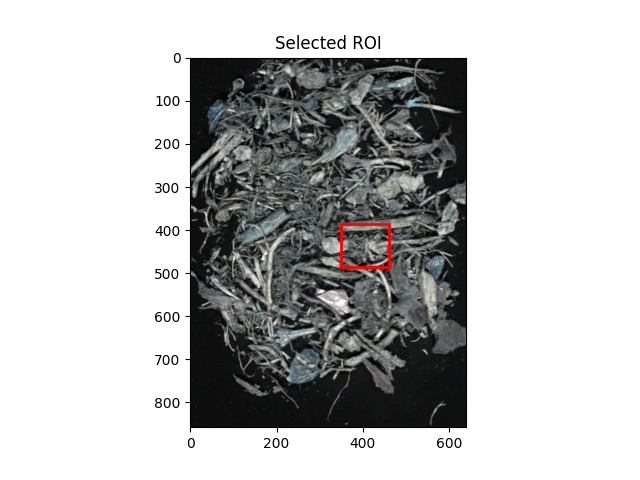

In [7]:
# Display ROI on top of the image
roi_img = display_roi_rectangle(data, **roi, title="Selected ROI")

In [8]:
# Display mean reflectance of ROI
df = pd.DataFrame(roi_data, columns=COLUMN_NAMES)
plot = get_mean_plot(roi_data, COLUMN_NAMES, "Mean Reflectance of ROI", labels=PLOT_LABELS)
plot.show()

KeyboardInterrupt: 

In [ ]:
# Smooth and Transform data (preprocessing)
data_preprocessed = smooth_and_transform(roi_data)

In [ ]:
# Plot 500 samples of the transformed data
df_preprocessed = pd.DataFrame(data_preprocessed, columns=COLUMN_NAMES)
plot = get_sample_plot(df_preprocessed, 500, "Sample of 500 Spectra", labels=PLOT_LABELS)
plot.show()

In [ ]:
# For training data outliers should be removed
clean_data = remove_outliers(data_preprocessed, summary=True)

Removed indexes: [10059]
